# Lab 2


In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
import tensorflow as tf
import datetime, os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
print(tf.__version__)

2.3.0


In [4]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


## Part 2


In [5]:
data = pd.read_csv('winequality-red.csv')
np.random.seed(101)
tf.set_random_seed(101)

In [6]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

<AxesSubplot:>

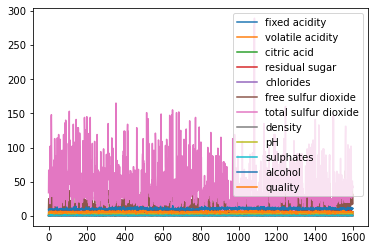

In [7]:
data.plot()

In [8]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [9]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
data.shape

(1599, 12)

In [11]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Histogramas


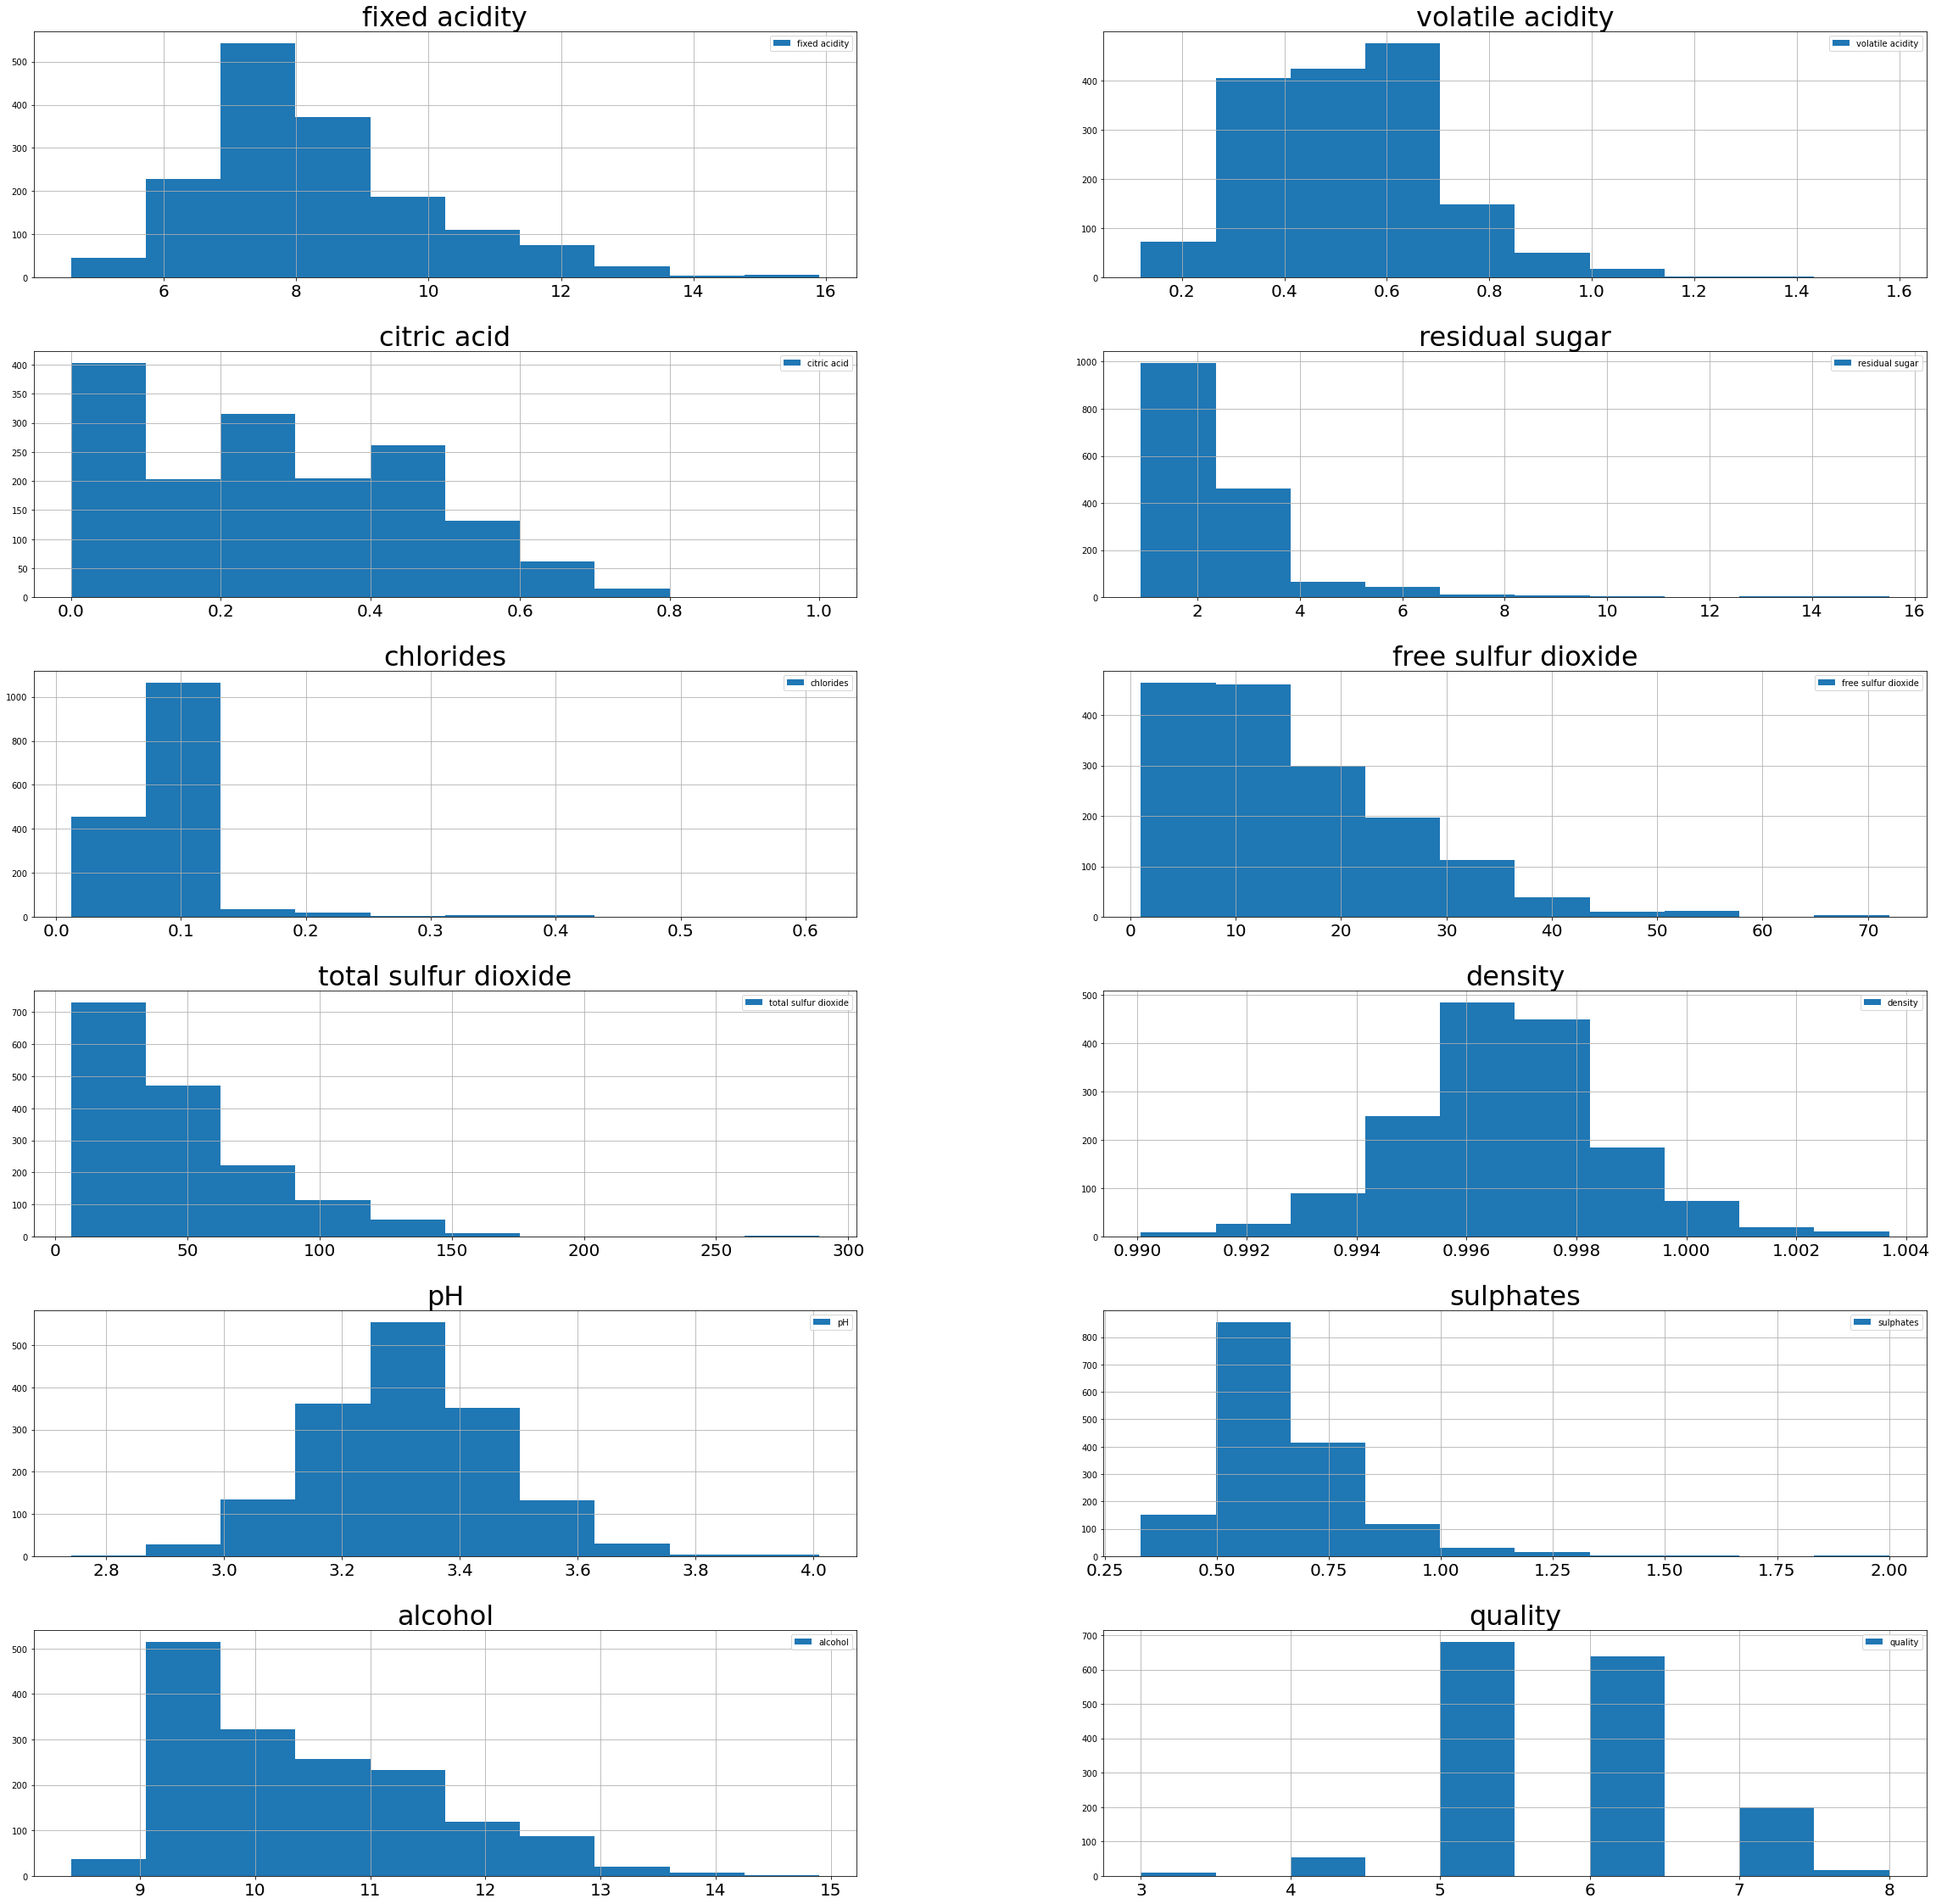

In [14]:
fig = data.hist(layout=(6,2), figsize=(40,40), legend=True, xlabelsize=20)
[x.title.set_size(32) for x in fig.ravel()]
print("Histogramas")

In [15]:
data.corr().sort_values("quality")["quality"]

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [16]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

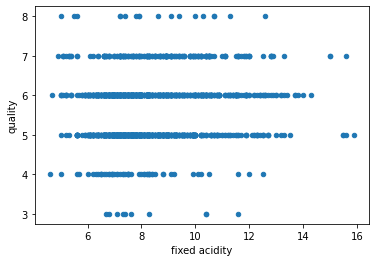

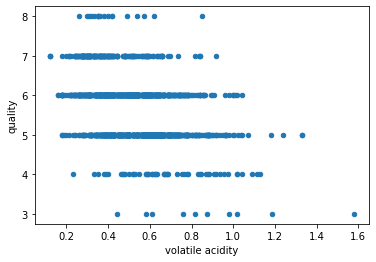

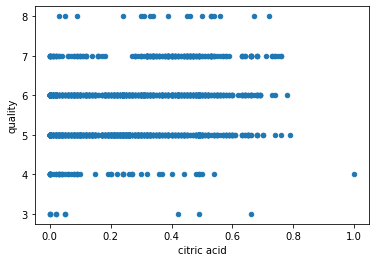

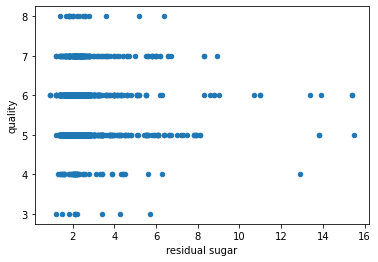

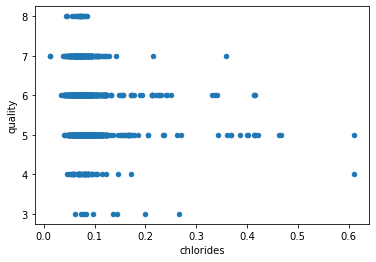

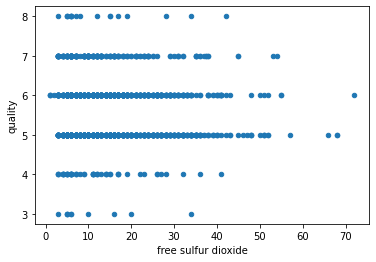

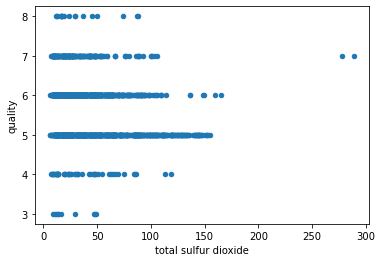

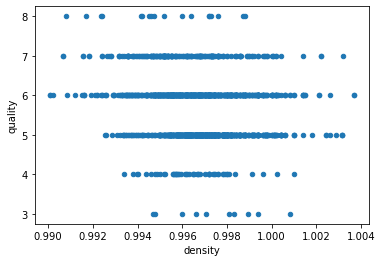

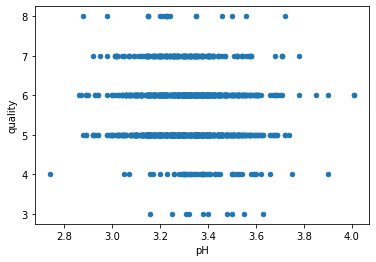

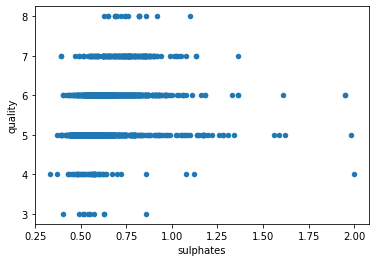

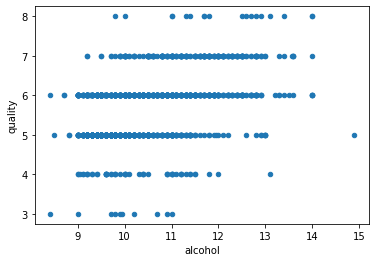

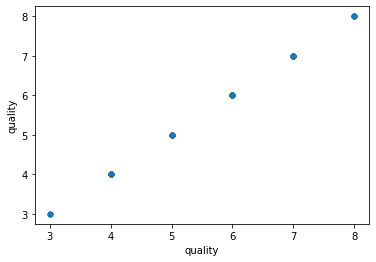

In [17]:
for col in data.columns:
    data.plot.scatter(x =col, y = "quality")

In [18]:
data_prefered = data[["density", "pH", "quality"]]
data_prefered.describe()

x, y = data_prefered[["density", "pH"]], data_prefered[["quality"]]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)
train_x.head(), train_y.head()

(     density    pH
 361  0.99820  3.37
 121  0.99620  3.21
 12   0.99430  3.58
 420  0.99720  3.28
 870  0.99371  3.41,
      quality
 361        6
 121        6
 12         5
 420        7
 870        6)

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
transformed = poly.fit_transform(train_x)
features = poly.get_feature_names()
train_x = pd.DataFrame(transformed, columns=features)
train_x

1       x0    x1      x0^2     x0 x1     x1^2
0     1.0  0.99820  3.37  0.996403  3.363934  11.3569
1     1.0  0.99620  3.21  0.992414  3.197802  10.3041
2     1.0  0.99430  3.58  0.988632  3.559594  12.8164
3     1.0  0.99720  3.28  0.994408  3.270816  10.7584
4     1.0  0.99371  3.41  0.987460  3.388551  11.6281
...   ...      ...   ...       ...       ...      ...
1114  1.0  0.99860  3.54  0.997202  3.535044  12.5316
1115  1.0  1.00000  3.00  1.000000  3.000000   9.0000
1116  1.0  0.99724  3.36  0.994488  3.350726  11.2896
1117  1.0  0.99306  3.55  0.986168  3.525363  12.6025
1118  1.0  0.99746  3.51  0.994926  3.501085  12.3201

[1119 rows x 6 columns]

In [20]:
transformed = poly.fit_transform(test_x)
features = poly.get_feature_names()
test_x = pd.DataFrame(transformed, columns=features)
test_x

1       x0    x1      x0^2     x0 x1     x1^2
0    1.0  0.99830  3.48  0.996603  3.474084  12.1104
1    1.0  0.99508  3.26  0.990184  3.243961  10.6276
2    1.0  0.99706  3.41  0.994129  3.399975  11.6281
3    1.0  0.99316  3.01  0.986367  2.989412   9.0601
4    1.0  0.99331  3.29  0.986665  3.267990  10.8241
..   ...      ...   ...       ...       ...      ...
475  1.0  0.99680  3.23  0.993610  3.219664  10.4329
476  1.0  0.99470  3.19  0.989428  3.173093  10.1761
477  1.0  0.99760  3.27  0.995206  3.262152  10.6929
478  1.0  0.99760  3.44  0.995206  3.431744  11.8336
479  1.0  0.99538  3.36  0.990781  3.344477  11.2896

[480 rows x 6 columns]

In [21]:
def compute_prediction(X, params):
    ## add a column of one's to add the bias (b) in the same vectorize operation
    with tf.name_scope("Model"):
        model = tf.linalg.matmul(X, params, name="Predict")
    return model

def compute_mse(y, y_hat):
    with tf.name_scope("Cost"):
        diff = tf.math.square(tf.math.subtract(y, y_hat))
        mse = 0.5 * tf.reduce_mean(diff, name="MSE")
        mse_summary = tf.summary.scalar(name="MSE_Summary", tensor=mse)
    return mse, mse_summary

def build_linear_model_graph(tensor_x, tensor_y, params, lr=0.001):
    prediction = compute_prediction(tensor_x, params)
    mse, mse_summary = compute_mse(tensor_y, prediction)
    with tf.name_scope("GradieDescent"):
        gradient = tf.gradients(mse, [params], name="Gradient")
        update_params = tf.assign(params, params - lr * gradient[0], name="UpdateParams")
    return prediction, update_params, params, mse, mse_summary

def fit(X, Y, batch_size, epochs=100, lr=0.001, print_n=10, logs_path='./logs/graph_'):
    tf.reset_default_graph()
    X = np.array(X).reshape(-1,6)
    Y = np.array(Y).reshape(-1,1)
    params = tf.get_variable("Params", dtype=tf.float32, shape=[6, 1],initializer=tf.zeros_initializer())
    tensor_x = tf.placeholder(tf.float32, [None,6], name="X")
    tensor_y = tf.placeholder(tf.float32, [None,1], name="Y")
    get_prediction, update_params, params, mse, mse_summary = build_linear_model_graph(tensor_x, tensor_y, params, lr)
    n = X.shape[0] // batch_size
    final_tetha = None
    path = f"{logs_path}_lr_{lr}_pol2_batch_size_{batch_size}{datetime.today().strftime('%Y%m%d-%H%M%S')}"
    with tf.train.MonitoredSession() as session:
        with tf.summary.FileWriter(path, session.graph) as train_writer:
            for epoch in range(epochs): 
                for i in range(n):
                    start, end = i * batch_size, (i+1) * batch_size
                    x_mbatch = np.array(X[start:end,:]).reshape(-1,6)
                    y_mbatch = np.array(Y[start:end]).reshape(-1,1)
                    feed_dict = { tensor_x: x_mbatch, tensor_y: y_mbatch}
                    _, theta = session.run([update_params, params], feed_dict=feed_dict)
                if (epoch + 1) % print_n == 0:
                    feed_dict = { tensor_x: np.array(X).reshape(-1,6), tensor_y: np.array(Y).reshape(-1,1) }
                    e_summary, error =  session.run([mse_summary, mse], feed_dict = feed_dict)
                    train_writer.add_summary(e_summary, epoch)
            final_theta = session.run(params, feed_dict=feed_dict)
    def predict(x): 
        return compute_prediction(x, params)
    return final_theta, predict

In [29]:
%tensorboard --logdir logs
theta, predict = fit(train_x, train_y, batch_size=16, epochs=1000, lr=0.001, print_n=20)


Reusing TensorBoard on port 6006 (pid 42896), started 0:09:31 ago. (Use '!kill 42896' to kill it.)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [23]:
with tf.Session() as session:
    predictions = compute_prediction(np.array(test_x).reshape(-1,6).astype('float32'),theta)                               
    y_estimates, (mse, mse_summary) = session.run([predictions, compute_mse(np.array(test_y).reshape(-1,1).astype('float32'), predictions)])
    print(50 * "-")
    print(mse)

--------------------------------------------------
0.35521838


In [35]:
print(theta)

[[ 0.75499123]
 [ 0.7406025 ]
 [ 1.1864152 ]
 [ 0.7263774 ]
 [ 1.1412513 ]
 [-0.39214414]]


In [36]:
test_y.value_counts()


quality
5          208
6          180
7           63
4           19
3            5
8            5
dtype: int64

### Graph
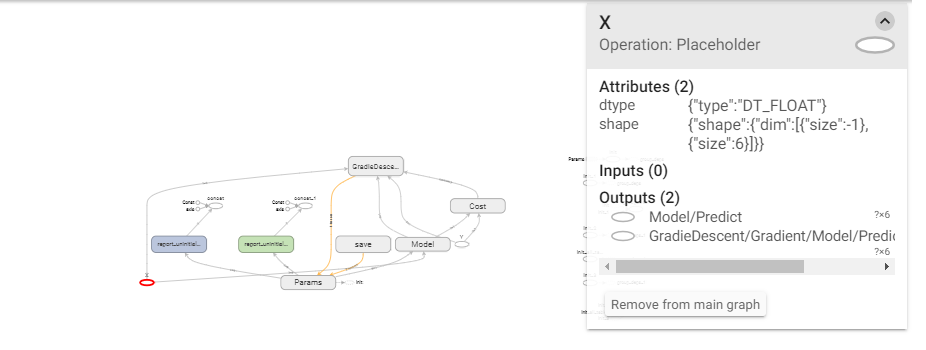

### Scalars
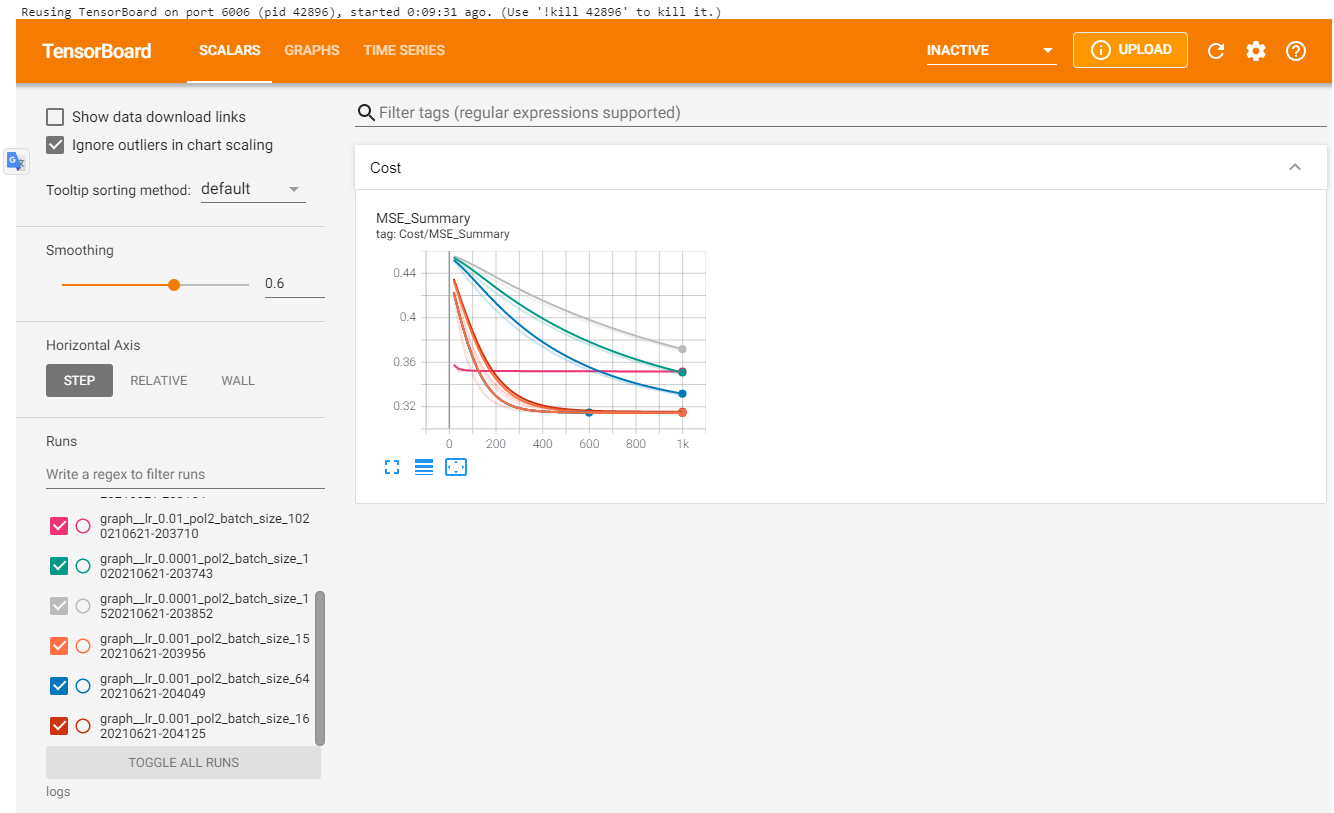

## Conclusiones
Segun la grafica de MSE, el mejor modelo es un polinomio grado 2 con lr=0.001,  batch_size=16. El costo se reduce rapidamente hasta llegar a un MSE de 0.3146